# **先匯入鐵達尼號資料 / Importing Data Sets**
# **(kaggle_titanic_train/kaggle_titanic_test)**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle_titanic_test.csv to kaggle_titanic_test.csv
Saving kaggle_titanic_train.csv to kaggle_titanic_train.csv
User uploaded file "kaggle_titanic_test.csv" with length 29474 bytes
User uploaded file "kaggle_titanic_train.csv" with length 61194 bytes


# **建立SVM模型 / Building SVM Model**

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm, preprocessing, metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score

# 載入資料 / reading csv files
url_train = "/content/kaggle_titanic_train.csv"
url_test = "/content/kaggle_titanic_test.csv"
titanic_train = pd.read_csv(url_train)
titanic_test = pd.read_csv(url_test)

# 將 Age 遺漏值以 median 填補 / Fill the void of the column "Age" with median
age_median_train = np.nanmedian(titanic_train["Age"])
new_Age_train = np.where(titanic_train["Age"].isnull(), age_median_train, titanic_train["Age"])
titanic_train["Age"] = new_Age_train
titanic_train

age_median_test = np.nanmedian(titanic_test["Age"])
new_Age_test = np.where(titanic_test["Age"].isnull(), age_median_test, titanic_test["Age"])
titanic_test["Age"] = new_Age_test
titanic_test

# 創造 dummy variables / Create dummy variables for the column "Sex"
titanic_train_sex = pd.get_dummies(titanic_train["Sex"])

titanic_test_sex = pd.get_dummies(titanic_test["Sex"])

# 建立 x_train & x_val & x_test / Creating training set, validation set, and test set of X
df1 = pd.DataFrame([titanic_train["Pclass"], titanic_train["Age"]]).T
df2 = df1.join(titanic_train_sex, how='outer')
df3 = df2.join(titanic_train["Survived"])
df4 = pd.DataFrame([titanic_test["Pclass"], titanic_test["Age"]]).T
df5 = df4.join(titanic_test_sex, how='outer')
df6 = df5.join(titanic_test["Survived"])

N = len(df3)
N1 = int(4 * N / 5) # 切分為4：1 / Divide df3 into two sets using a ratio of 4:1, 4 being the training set and 1 being the validation set
x_train = df3.iloc[:N1, :-1]
x_val = df3.iloc[N1:, :-1]
x_test = df6.iloc[:, :-1]

# 建立 train_Y & valid_Y &test_Y / Creating training set, validation set, and test set of Y
y_train = df3.iloc[:N1, -1]
y_val = df3.iloc[N1:, -1]
y_test = df6.iloc[:, -1]

# 標準化 / Regularization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)
x_test_std = sc.transform(x_test)

# 建立 SVC 模型 / Building the SVM model
model = SVC()
model.fit(x_train_std, y_train)

# 先對validation做跑分 / Score the model using the validation set
y_predict_val = model.predict(x_val_std)
print(f'The score for this model is {model.score(x_val_std, y_val):.6f}.')
recall = recall_score(y_val, y_predict_val, average=None).sum()
print(f'The recall for this model is {recall:.6f}.')

# 績效 / Evaluation of model on the validation set
accuracy = metrics.accuracy_score(y_val, y_predict_val)
print(accuracy)
print(y_predict_val)

The score for this model is 0.826816.
The recall for this model is 1.612636.
0.8268156424581006
[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [3]:
# 這邊可以用迴圈調整參數：C懲罰係數 & Z值。
# 利用迴圈調整參數對val不斷跑分，找出理想模型
# Use loop to adjust the parameter C and Z to find the best model (scoring each model with the validation set)

In [4]:
# 再利用test做模型驗證跑分 / Score the model using the test set
y_predict = model.predict(x_test_std)
print(f'The score for this model is {model.score(x_test_std, y_test):.6f}.') #這邊其實就是後面的accuracy
recall = recall_score(y_test, y_predict, average=None).sum()
print(f'The recall for this model is {recall:.6f}.') #這兩行其實就是後面的recall rate
print(y_predict)

The score for this model is 0.985646.
The recall for this model is 1.968985.
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# **輸出機率分類判斷 / Probability for each X(1~3)**

In [5]:
model = SVC(probability=True)
model.fit(x_train_std, y_train)
y_predict_pT = model.predict(x_test_std)
prob_val = np.round(model.predict_proba(x_val_std),4)
prob_test = np.round(model.predict_proba(x_test_std),4)
print(prob_val)
print("-----------------------------")
print(prob_test)

[[0.7947 0.2053]
 [0.7975 0.2025]
 [0.8013 0.1987]
 [0.7985 0.2015]
 [0.2227 0.7773]
 [0.2196 0.7804]
 [0.7975 0.2025]
 [0.7976 0.2024]
 [0.2266 0.7734]
 [0.7987 0.2013]
 [0.8119 0.1881]
 [0.7993 0.2007]
 [0.7952 0.2048]
 [0.7983 0.2017]
 [0.2194 0.7806]
 [0.2748 0.7252]
 [0.808  0.192 ]
 [0.2471 0.7529]
 [0.2318 0.7682]
 [0.7976 0.2024]
 [0.8153 0.1847]
 [0.7976 0.2024]
 [0.7976 0.2024]
 [0.7975 0.2025]
 [0.6857 0.3143]
 [0.7957 0.2043]
 [0.7975 0.2025]
 [0.7975 0.2025]
 [0.7975 0.2025]
 [0.7944 0.2056]
 [0.2314 0.7686]
 [0.7977 0.2023]
 [0.7975 0.2025]
 [0.7786 0.2214]
 [0.7988 0.2012]
 [0.2194 0.7806]
 [0.7229 0.2771]
 [0.7975 0.2025]
 [0.2236 0.7764]
 [0.7918 0.2082]
 [0.7976 0.2024]
 [0.7978 0.2022]
 [0.2333 0.7667]
 [0.2851 0.7149]
 [0.7975 0.2025]
 [0.7443 0.2557]
 [0.7976 0.2024]
 [0.2293 0.7707]
 [0.7975 0.2025]
 [0.7976 0.2024]
 [0.7983 0.2017]
 [0.2257 0.7743]
 [0.7988 0.2012]
 [0.2044 0.7956]
 [0.7975 0.2025]
 [0.3111 0.6889]
 [0.7975 0.2025]
 [0.7976 0.2024]
 [0.7977 0.202

# **混淆矩陣 / Confusion Matrix**

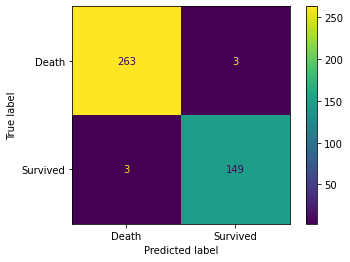

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score
import matplotlib.pyplot as plt
target_names = ['Death', 'Survived']
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

# **SVM模型績效 / Evaluation**

## **AUC**


*   AUC = 1，是完美分類器。
*   AUC = [0.85, 0.95]，效果很好
*   AUC = [0.7, 0.85]，效果一般
*   AUC = [0.5, 0.7]，效果較低，但用於預測股票已經很不錯了
*   AUC = 0.5，跟隨機猜測一樣（例：丟銅板），模型沒有預測價值。
*   AUC < 0.5，比隨機猜測還差；但只要總是反預測而行，就優於隨機猜測。

In [7]:
# 績效
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
auc = metrics.auc(fpr, tpr)
print(auc)
if auc == 1.0:
  print("完美分類器 / Perfect")
elif auc < 1.0 and auc >= 0.85:
  print("效果很好 / Good")
elif auc < 0.85 and auc >= 0.70:
  print("效果一般 / Normal")
elif auc < 0.70 and auc >= 0.50:
  print("效果較低 / Low")
elif auc == 0.50:
  print("沒有預測價值 / No Value")
else:
  print("請進行反預測 / Please act oppositely to the prediction!")

0.9844924812030075
效果很好 / Good


## **Accuracy & Recall Rate**

In [8]:
print(classification_report(y_test, y_predict, target_names=target_names, digits=6))

              precision    recall  f1-score   support

       Death   0.988722  0.988722  0.988722       266
    Survived   0.980263  0.980263  0.980263       152

    accuracy                       0.985646       418
   macro avg   0.984492  0.984492  0.984492       418
weighted avg   0.985646  0.985646  0.985646       418



In [9]:
# 附註：回去翻test資料，266名男性都死了，152名女性全數存活。
# Note: According to the test set, all 266 males died and all 152 females survived.